MNIST classification (drawn from sklearn example)
=====================================================
MWEM is not particularly well suited for image data (where there are tons of features with relatively large ranges) but it is still able to capture some important information about the underlying distributions if tuned correctly.

We use a feature included with MWEM that allows a column to be specified for a custom bin count, if we are capping every other bin count at a small value. In this case, we specify that the numerical column (784) has 10 possible values. We do this with the dict {'784': 10}.

Here we borrow from a scikit-learn example, and insert MWEM synthetic data into their training example/visualization, to understand the tradeoffs.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-download-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py


In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# pip install scikit-image
from skimage import data, color
from skimage.transform import rescale 

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
data = fetch_openml('mnist_784', version=1, return_X_y=False)

In [2]:
data_np = np.hstack((data.data,np.reshape(data.target.astype(int), (-1, 1))))

In [3]:
from opendp.whitenoise.synthesizers.mwem import MWEMSynthesizer

# Here we set max bin count to be 10, so that we retain the numeric labels
synth = MWEMSynthesizer(200, 10.0, 25, 15, split_factor=1, max_bin_count = 25, custom_bin_count={'784':10})
synth.fit(data_np)

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 117.0 in column: 12 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 255.0 in column: 13 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 217.0 in column: 14 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoi

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 72 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 73 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 74 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoi

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 108 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 235.0 in column: 109 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 164.0 in column: 110 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 149 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 150 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 151 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 182 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 183 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 184 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 215 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 216 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 217 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 244 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 245 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 246 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 275 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 276 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 277 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 244.0 in column: 307 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 151.0 in column: 308 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 309 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 157.0 in column: 335 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 164.0 in column: 336 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 337 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 254.0 in column: 365 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 366 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 367 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 398 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 399 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 400 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 429 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 430 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 431 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 465 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 466 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 467 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 495 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 496 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 497 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 526 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 527 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 528 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 562 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 563 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 564 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 599 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 600 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 601 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 631 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 632 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 633 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 151.0 in column: 670 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 254.0 in column: 674 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 254.0 in column: 675 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 709 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 710 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 711 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 744 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 745 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:255: Warning: Bin count 256.0 in column: 746 exceeds max_bin_count, defaulting to: 25. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [0]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [1]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [0]
Estimate duration till completion: 0.257 seconds (lower bound)
Initializing iteration with columns [1]
Estimate duration till completion: 0.3 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [2]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [2]
Estimate duration till completion: 0.296 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [3]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [3]
Estimate duration till completion: 1.781 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [4]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [5]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [4]
Estimate duration till completion: 0.64 seconds (lower bound)
Initializing iteration with columns [5]
Estimate duration till completion: 0.238 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [6]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [6]
Estimate duration till completion: 0.313 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [7]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [8]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [7]
Estimate duration till completion: 1.735 seconds (lower bound)
Initializing iteration with columns [8]
Estimate duration till completion: 0.341 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [9]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [10]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [9]
Estimate duration till completion: 0.326 seconds (lower bound)
Initializing iteration with columns [10]
Estimate duration till completion: 1.351 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [11]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [11]
Estimate duration till completion: 0.352 seconds (lower bound)
Initializing iteration with columns [12]
Estimate duration till completion: 0.538 seconds (lower bound)
Initializing iteration with columns [13]
Estimate duration till completion: 0.248 seconds (lower bound)
Initializing iteration with columns [14]
Estimate duration till completion: 0.385 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 10.0 Split: [15]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [16]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [15]
Estimate duration till completion: 0.361 seconds (lower bound)
Initializing iteration with columns [16]
Estimate duration till completion: 0.337 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [17]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [18]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [17]
Estimate duration till completion: 0.4 seconds (lower bound)
Initializing iteration with columns [18]
Estimate duration till completion: 0.352 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [19]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [19]
Estimate duration till completion: 0.531 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [20]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [21]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [20]
Estimate duration till completion: 0.317 seconds (lower bound)
Initializing iteration with columns [21]
Estimate duration till completion: 0.319 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [22]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [23]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [22]
Estimate duration till completion: 0.333 seconds (lower bound)
Initializing iteration with columns [23]
Estimate duration till completion: 0.277 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [24]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [25]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [24]
Estimate duration till completion: 0.708 seconds (lower bound)
Initializing iteration with columns [25]
Estimate duration till completion: 0.292 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [26]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [27]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [26]
Estimate duration till completion: 0.261 seconds (lower bound)
Initializing iteration with columns [27]
Estimate duration till completion: 0.292 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [28]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [29]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [28]
Estimate duration till completion: 0.244 seconds (lower bound)
Initializing iteration with columns [29]
Estimate duration till completion: 0.274 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [30]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [31]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [30]
Estimate duration till completion: 0.268 seconds (lower bound)
Initializing iteration with columns [31]
Estimate duration till completion: 0.306 seconds (lower bound)
Initializing iteration with columns [32]
Estimate duration till completion: 0.296 seconds (lower bound)
Initializing iteration with columns [33]
Estimate duration till completion: 0.334 seconds (lower bound)
Initializing iteration with columns [34]
Estimate duration till completion: 0.309 seconds (lower bound)
Initializing iteration with columns [35]
Estimate duration till completion: 0.33 seconds (lower bound)
Initializing iteration with columns [36]
Estimate duration till completion: 0.604 seconds (lower bound)
Initializing iteration with columns [37]
Estimate duration till completion: 0.288 seconds (lower bound)
Initializing iteration with columns [38]
Estimate duration till completion: 0.337 seconds (lower bound)
Initializing iteration with columns [39]
Estimate duration till c

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [52]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [53]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [51]
Estimate duration till completion: 0.31 seconds (lower bound)
Initializing iteration with columns [52]
Estimate duration till completion: 0.274 seconds (lower bound)
Initializing iteration with columns [53]
Estimate duration till completion: 0.318 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [54]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [55]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [54]
Estimate duration till completion: 0.332 seconds (lower bound)
Initializing iteration with columns [55]
Estimate duration till completion: 0.508 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [56]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [57]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [56]
Estimate duration till completion: 0.291 seconds (lower bound)
Initializing iteration with columns [57]
Estimate duration till completion: 0.33 seconds (lower bound)
Initializing iteration with columns [58]
Estimate duration till completion: 0.35 seconds (lower bound)
Initializing iteration with columns [59]
Estimate duration till completion: 0.445 seconds (lower bound)
Initializing iteration with columns [60]
Estimate duration till completion: 0.336 seconds (lower bound)
Initializing iteration with columns [61]
Estimate duration till completion: 0.402 seconds (lower bound)
Initializing iteration with columns [62]
Estimate duration till completion: 0.596 seconds (lower bound)
Initializing iteration with columns [63]
Estimate duration till completion: 0.553 seconds (lower bound)
Initializing iteration with columns [64]
Estimate duration till completion: 0.521 seconds (lower bound)
Initializing iteration with columns [65]
Estimate duration till co

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [82]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [83]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [83]
Estimate duration till completion: 0.335 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [84]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [85]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [84]
Estimate duration till completion: 0.338 seconds (lower bound)
Initializing iteration with columns [85]
Estimate duration till completion: 0.412 seconds (lower bound)
Initializing iteration with columns [86]
Estimate duration till completion: 0.304 seconds (lower bound)
Initializing iteration with columns [87]
Estimate duration till completion: 0.302 seconds (lower bound)
Initializing iteration with columns [88]
Estimate duration till completion: 0.261 seconds (lower bound)
Initializing iteration with columns [89]
Estimate duration till completion: 0.405 seconds (lower bound)
Initializing iteration with columns [90]
Estimate duration till completion: 0.332 seconds (lower bound)
Initializing iteration with columns [91]
Estimate duration till completion: 0.254 seconds (lower bound)
Initializing iteration with columns [92]
Estimate duration till completion: 0.29 seconds (lower bound)
Initializing iteration with columns [93]
Estimate duration till c

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [111]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [112]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [111]
Estimate duration till completion: 0.278 seconds (lower bound)
Initializing iteration with columns [112]
Estimate duration till completion: 0.284 seconds (lower bound)
Initializing iteration with columns [113]
Estimate duration till completion: 0.36 seconds (lower bound)
Initializing iteration with columns [114]
Estimate duration till completion: 0.713 seconds (lower bound)
Initializing iteration with columns [115]
Estimate duration till completion: 0.302 seconds (lower bound)
Initializing iteration with columns [116]
Estimate duration till completion: 0.431 seconds (lower bound)
Initializing iteration with columns [117]
Estimate duration till completion: 1.218 seconds (lower bound)
Initializing iteration with columns [118]
Estimate duration till completion: 0.513 seconds (lower bound)
Initializing iteration with columns [119]
Estimate duration till completion: 0.318 seconds (lower bound)
Initializing iteration with columns [120]
Estimate durat

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [140]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [140]
Estimate duration till completion: 0.304 seconds (lower bound)
Initializing iteration with columns [141]
Estimate duration till completion: 0.277 seconds (lower bound)
Initializing iteration with columns [142]
Estimate duration till completion: 0.361 seconds (lower bound)
Initializing iteration with columns [143]
Estimate duration till completion: 0.293 seconds (lower bound)
Initializing iteration with columns [144]
Estimate duration till completion: 0.254 seconds (lower bound)
Initializing iteration with columns [145]
Estimate duration till completion: 0.313 seconds (lower bound)
Initializing iteration with columns [146]
Estimate duration till completion: 0.368 seconds (lower bound)
Initializing iteration with columns [147]
Estimate duration till completion: 0.588 seconds (lower bound)
Initializing iteration with columns [148]
Estimate duration till completion: 0.265 seconds (lower bound)
Initializing iteration with columns [149]
Estimate dura

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [168]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 8.0 Split: [169]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [169]
Estimate duration till completion: 0.349 seconds (lower bound)
Initializing iteration with columns [170]
Estimate duration till completion: 0.39 seconds (lower bound)
Initializing iteration with columns [171]
Estimate duration till completion: 0.302 seconds (lower bound)
Initializing iteration with columns [172]
Estimate duration till completion: 0.501 seconds (lower bound)
Initializing iteration with columns [173]
Estimate duration till completion: 0.343 seconds (lower bound)
Initializing iteration with columns [174]
Estimate duration till completion: 0.338 seconds (lower bound)
Initializing iteration with columns [175]
Estimate duration till completion: 0.372 seconds (lower bound)
Initializing iteration with columns [176]
Estimate duration till completion: 0.329 seconds (lower bound)
Initializing iteration with columns [177]
Estimate duration till completion: 0.476 seconds (lower bound)
Initializing iteration with columns [178]
Estimate durat

Initializing iteration with columns [248]
Estimate duration till completion: 0.39 seconds (lower bound)
Initializing iteration with columns [249]
Estimate duration till completion: 0.313 seconds (lower bound)
Initializing iteration with columns [250]
Estimate duration till completion: 0.443 seconds (lower bound)
Initializing iteration with columns [251]
Estimate duration till completion: 0.364 seconds (lower bound)
Initializing iteration with columns [252]
Estimate duration till completion: 0.491 seconds (lower bound)
Initializing iteration with columns [253]
Estimate duration till completion: 0.437 seconds (lower bound)
Initializing iteration with columns [254]
Estimate duration till completion: 0.925 seconds (lower bound)
Initializing iteration with columns [255]
Estimate duration till completion: 0.314 seconds (lower bound)
Initializing iteration with columns [256]
Estimate duration till completion: 0.25 seconds (lower bound)
Initializing iteration with columns [257]
Estimate durati

Initializing iteration with columns [327]
Estimate duration till completion: 0.311 seconds (lower bound)
Initializing iteration with columns [328]
Estimate duration till completion: 0.31 seconds (lower bound)
Initializing iteration with columns [329]
Estimate duration till completion: 0.456 seconds (lower bound)
Initializing iteration with columns [330]
Estimate duration till completion: 0.314 seconds (lower bound)
Initializing iteration with columns [331]
Estimate duration till completion: 0.303 seconds (lower bound)
Initializing iteration with columns [332]
Estimate duration till completion: 0.341 seconds (lower bound)
Initializing iteration with columns [333]
Estimate duration till completion: 0.334 seconds (lower bound)
Initializing iteration with columns [334]
Estimate duration till completion: 0.321 seconds (lower bound)
Initializing iteration with columns [335]
Estimate duration till completion: 0.275 seconds (lower bound)
Initializing iteration with columns [336]
Estimate durat

Initializing iteration with columns [407]
Estimate duration till completion: 0.268 seconds (lower bound)
Initializing iteration with columns [408]
Estimate duration till completion: 1.71 seconds (lower bound)
Initializing iteration with columns [409]
Estimate duration till completion: 0.332 seconds (lower bound)
Initializing iteration with columns [410]
Estimate duration till completion: 0.375 seconds (lower bound)
Initializing iteration with columns [411]
Estimate duration till completion: 0.399 seconds (lower bound)
Initializing iteration with columns [412]
Estimate duration till completion: 0.753 seconds (lower bound)
Initializing iteration with columns [413]
Estimate duration till completion: 0.327 seconds (lower bound)
Initializing iteration with columns [414]
Estimate duration till completion: 0.342 seconds (lower bound)
Initializing iteration with columns [415]
Estimate duration till completion: 0.37 seconds (lower bound)
Initializing iteration with columns [416]
Estimate durati

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [476]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [477]
Estimate duration till completion: 0.386 seconds (lower bound)
Initializing iteration with columns [478]
Estimate duration till completion: 0.355 seconds (lower bound)
Initializing iteration with columns [479]
Estimate duration till completion: 0.267 seconds (lower bound)
Initializing iteration with columns [480]
Estimate duration till completion: 0.398 seconds (lower bound)
Initializing iteration with columns [481]
Estimate duration till completion: 0.288 seconds (lower bound)
Initializing iteration with columns [482]
Estimate duration till completion: 0.346 seconds (lower bound)
Initializing iteration with columns [483]
Estimate duration till completion: 0.334 seconds (lower bound)
Initializing iteration with columns [484]
Estimate duration till completion: 0.439 seconds (lower bound)
Initializing iteration with columns [485]
Estimate duration till completion: 0.513 seconds (lower bound)
Initializing iteration with columns [486]
Estimate dura

Initializing iteration with columns [556]
Estimate duration till completion: 0.412 seconds (lower bound)
Initializing iteration with columns [557]
Estimate duration till completion: 0.522 seconds (lower bound)
Initializing iteration with columns [558]
Estimate duration till completion: 0.278 seconds (lower bound)
Initializing iteration with columns [559]
Estimate duration till completion: 0.445 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [560]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [560]
Estimate duration till completion: 0.441 seconds (lower bound)
Initializing iteration with columns [561]
Estimate duration till completion: 0.319 seconds (lower bound)
Initializing iteration with columns [562]
Estimate duration till completion: 0.443 seconds (lower bound)
Initializing iteration with columns [563]
Estimate duration till completion: 0.362 seconds (lower bound)
Initializing iteration with columns [564]
Estimate duration till completion: 0.544 seconds (lower bound)
Initializing iteration with columns [565]
Estimate duration till completion: 0.44 seconds (lower bound)
Initializing iteration with columns [566]
Estimate duration till completion: 0.312 seconds (lower bound)
Initializing iteration with columns [567]
Estimate duration till completion: 0.289 seconds (lower bound)
Initializing iteration with columns [568]
Estimate duration till completion: 0.365 seconds (lower bound)
Initializing iteration with columns [569]
Estimate durat

Initializing iteration with columns [639]
Estimate duration till completion: 0.56 seconds (lower bound)
Initializing iteration with columns [640]
Estimate duration till completion: 0.431 seconds (lower bound)
Initializing iteration with columns [641]
Estimate duration till completion: 1.518 seconds (lower bound)
Initializing iteration with columns [642]
Estimate duration till completion: 0.35 seconds (lower bound)
Initializing iteration with columns [643]
Estimate duration till completion: 0.869 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [644]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [644]
Estimate duration till completion: 0.7 seconds (lower bound)
Initializing iteration with columns [645]
Estimate duration till completion: 0.351 seconds (lower bound)
Initializing iteration with columns [646]
Estimate duration till completion: 0.31 seconds (lower bound)
Initializing iteration with columns [647]
Estimate duration till completion: 0.538 seconds (lower bound)
Initializing iteration with columns [648]
Estimate duration till completion: 0.548 seconds (lower bound)
Initializing iteration with columns [649]
Estimate duration till completion: 0.454 seconds (lower bound)
Initializing iteration with columns [650]
Estimate duration till completion: 0.462 seconds (lower bound)
Initializing iteration with columns [651]
Estimate duration till completion: 0.348 seconds (lower bound)
Initializing iteration with columns [652]
Estimate duration till completion: 0.449 seconds (lower bound)
Initializing iteration with columns [653]
Estimate duratio

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [671]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [671]
Estimate duration till completion: 0.911 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [672]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [672]
Estimate duration till completion: 1.351 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [673]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [673]
Estimate duration till completion: 0.251 seconds (lower bound)
Initializing iteration with columns [674]
Estimate duration till completion: 0.488 seconds (lower bound)
Initializing iteration with columns [675]
Estimate duration till completion: 0.948 seconds (lower bound)
Initializing iteration with columns [676]
Estimate duration till completion: 0.749 seconds (lower bound)
Initializing iteration with columns [677]
Estimate duration till completion: 0.357 seconds (lower bound)
Initializing iteration with columns [678]
Estimate duration till completion: 0.346 seconds (lower bound)
Initializing iteration with columns [679]
Estimate duration till completion: 0.314 seconds (lower bound)
Initializing iteration with columns [680]
Estimate duration till completion: 0.358 seconds (lower bound)
Initializing iteration with columns [681]
Estimate duration till completion: 0.291 seconds (lower bound)
Initializing iteration with columns [682]
Estimate dura

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [699]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [699]
Estimate duration till completion: 0.394 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [700]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [701]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [700]
Estimate duration till completion: 0.352 seconds (lower bound)
Initializing iteration with columns [701]
Estimate duration till completion: 0.329 seconds (lower bound)
Initializing iteration with columns [702]
Estimate duration till completion: 0.345 seconds (lower bound)
Initializing iteration with columns [703]
Estimate duration till completion: 0.472 seconds (lower bound)
Initializing iteration with columns [704]
Estimate duration till completion: 2.136 seconds (lower bound)
Initializing iteration with columns [705]
Estimate duration till completion: 0.313 seconds (lower bound)
Initializing iteration with columns [706]
Estimate duration till completion: 0.477 seconds (lower bound)
Initializing iteration with columns [707]
Estimate duration till completion: 0.332 seconds (lower bound)
Initializing iteration with columns [708]
Estimate duration till completion: 0.37 seconds (lower bound)
Initializing iteration with columns [709]
Estimate durat

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [727]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [727]
Estimate duration till completion: 0.402 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [728]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [729]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [728]
Estimate duration till completion: 0.341 seconds (lower bound)
Initializing iteration with columns [729]
Estimate duration till completion: 0.493 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [730]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [730]
Estimate duration till completion: 0.428 seconds (lower bound)
Initializing iteration with columns [731]
Estimate duration till completion: 0.863 seconds (lower bound)
Initializing iteration with columns [732]
Estimate duration till completion: 1.251 seconds (lower bound)
Initializing iteration with columns [733]
Estimate duration till completion: 0.437 seconds (lower bound)
Initializing iteration with columns [734]
Estimate duration till completion: 0.472 seconds (lower bound)
Initializing iteration with columns [735]
Estimate duration till completion: 0.388 seconds (lower bound)
Initializing iteration with columns [736]
Estimate duration till completion: 0.494 seconds (lower bound)
Initializing iteration with columns [737]
Estimate duration till completion: 0.317 seconds (lower bound)
Initializing iteration with columns [738]
Estimate duration till completion: 0.321 seconds (lower bound)
Initializing iteration with columns [739]
Estimate dura

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [754]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [755]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [754]
Estimate duration till completion: 0.294 seconds (lower bound)
Initializing iteration with columns [755]
Estimate duration till completion: 0.264 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [756]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [756]
Estimate duration till completion: 0.338 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [757]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [757]
Estimate duration till completion: 0.439 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [758]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [759]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [758]
Estimate duration till completion: 0.496 seconds (lower bound)
Initializing iteration with columns [759]
Estimate duration till completion: 0.278 seconds (lower bound)
Initializing iteration with columns [760]
Estimate duration till completion: 0.297 seconds (lower bound)
Initializing iteration with columns [761]
Estimate duration till completion: 0.459 seconds (lower bound)
Initializing iteration with columns [762]
Estimate duration till completion: 0.258 seconds (lower bound)
Initializing iteration with columns [763]
Estimate duration till completion: 1.744 seconds (lower bound)
Initializing iteration with columns [764]
Estimate duration till completion: 0.339 seconds (lower bound)
Initializing iteration with columns [765]
Estimate duration till completion: 0.393 seconds (lower bound)
Initializing iteration with columns [766]
Estimate duration till completion: 0.306 seconds (lower bound)
Initializing iteration with columns [767]
Estimate dura

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [780]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [780]
Estimate duration till completion: 0.724 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [781]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [782]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [781]
Estimate duration till completion: 0.313 seconds (lower bound)
Initializing iteration with columns [782]
Estimate duration till completion: 0.289 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 1.0 Split: [783]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [783]
Estimate duration till completion: 0.373 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:166: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1). Dim: 10 Split: [784]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [784]
Estimate duration till completion: 0.662 seconds (lower bound)


In [4]:
sample_size = 2000
synthetic = synth.sample(sample_size)


Trained on Real Data
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        40
         1.0       0.83      1.00      0.91        53
         2.0       0.73      0.50      0.59        32
         3.0       0.75      0.71      0.73        38
         4.0       0.67      0.83      0.74        42
         5.0       0.65      0.65      0.65        40
         6.0       0.85      0.80      0.82        35
         7.0       0.70      0.57      0.63        40
         8.0       0.66      0.63      0.64        30
         9.0       0.65      0.62      0.63        50

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.73      0.73       400

Accuracy real: 0.7325

Trained on Synthetic Data
              precision    recall  f1-score   support

         0.0       0.12      0.12      0.12        40
         1.0       0.00      0.00      0.00        53
       

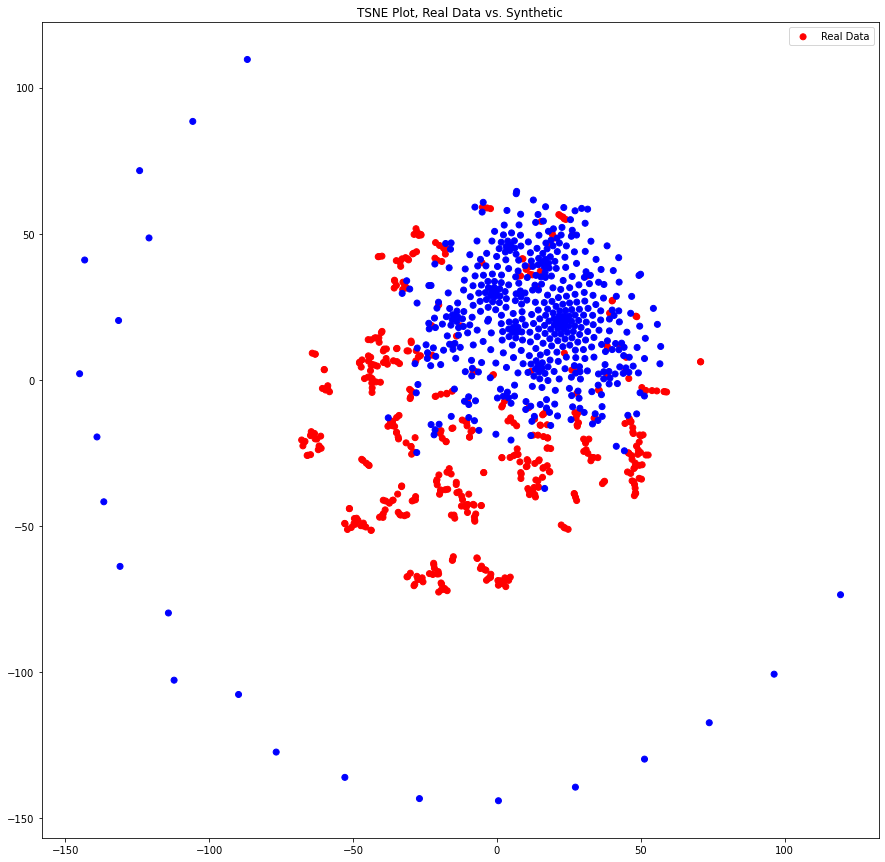

In [8]:
from sklearn.linear_model import RidgeClassifier

import utils

real = pd.DataFrame(data_np[:sample_size])

model_real, model_fake = utils.test_real_vs_synthetic_data(real, synthetic, RidgeClassifier, tsne=True)

Example run in 669.584 s


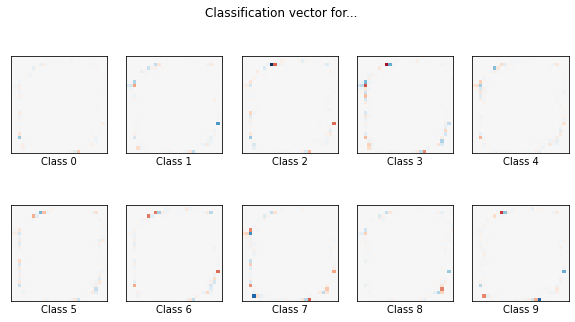

In [9]:
# Classification 
coef = model_real.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Example run in 670.041 s


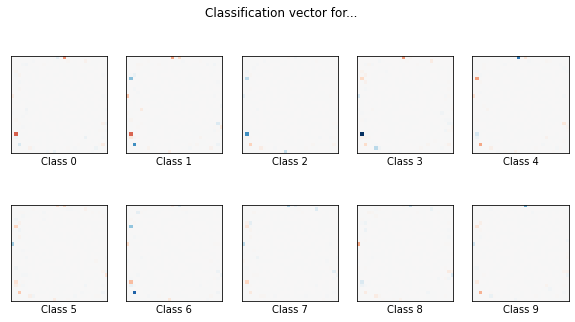

In [10]:
coef = model_fake.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()